## Transfer Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from getSIDMdata_generator import get_tf_DataSet as getGenerators
from copy import deepcopy as cp
import scienceplots
import mertens_models as mertens

plt.style.use(["science", "grid"])

Objectives
----------
1. To see if transfer learning the DMO simulations before training on the bayrons improves it

Notes
-------
For the DM I need stellar particles to put in. I cant use CDM of the same sim for the collisionless particles between CDM and SIDM since it will know about the data
So i need to use CDM (to mimic stellar) from a different run (i.e. redshift) (which doesnt exist currently) so for now the data for transfer learning is 

DMO : CDM_DMO + CDM_stars (z = 0)  and SIDM_DMO + CDM_stars (z = 0) 

BAR : CDM_BAR + CDM_stars (z != 0) and SIDM_BAR + SIDM_Stars (z = *)

Conclusions
-----------



In [3]:
epochs=100

### Get fiducials
 - fiducial_model
 - fiducial_model_2_channel

## Does it improve the model

#### 1a. Get the fiducial for total only

In [5]:
fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], allDataFile='pickles/allSimData_binning_20.pkl')
fiducial_model = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)
history = fiducial_model.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs
)

Number of 0.0 class : 1200
Number of 0.1 class : 1200
Number of 1.0 class : 1200
Epoch 1/100
90/90 [==============================] - 3s 34ms/step - loss: 0.9638 - accuracy: 0.5076 - val_loss: 0.8686 - val_accuracy: 0.5897
Epoch 2/100
90/90 [==============================] - 3s 33ms/step - loss: 0.7766 - accuracy: 0.6260 - val_loss: 0.7819 - val_accuracy: 0.6287
Epoch 3/100
90/90 [==============================] - 3s 33ms/step - loss: 0.7280 - accuracy: 0.6542 - val_loss: 0.7594 - val_accuracy: 0.6259
Epoch 4/100
90/90 [==============================] - 3s 33ms/step - loss: 0.7064 - accuracy: 0.6597 - val_loss: 0.7677 - val_accuracy: 0.6551
Epoch 5/100
90/90 [==============================] - 3s 33ms/step - loss: 0.6939 - accuracy: 0.6753 - val_loss: 0.7370 - val_accuracy: 0.6551
Epoch 6/100
90/90 [==============================] - 3s 33ms/step - loss: 0.6790 - accuracy: 0.6809 - val_loss: 0.7159 - val_accuracy: 0.6648
Epoch 7/100
90/90 [==============================] - 3s 34ms/step -

#### 1b. Get the fiducial for total and stellar

In [7]:
fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, allDataFile='pickles/allSimData_binning_20.pkl',
                                            simulationNames=['CDM','SIDM0.1','SIDM1'], channels=['total','stellar'])
fiducial_model_2_channel = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)
history = fiducial_model_2_channel.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=200, initial_epoch=0,
)

Number of 0.0 class : 1200
Number of 0.1 class : 1200
Number of 1.0 class : 1200
Epoch 1/200
90/90 [==============================] - 4s 37ms/step - loss: 0.9682 - accuracy: 0.5076 - val_loss: 0.8937 - val_accuracy: 0.5577
Epoch 2/200
90/90 [==============================] - 3s 35ms/step - loss: 0.8323 - accuracy: 0.5830 - val_loss: 0.8006 - val_accuracy: 0.6036
Epoch 3/200
90/90 [==============================] - 3s 35ms/step - loss: 0.7291 - accuracy: 0.6552 - val_loss: 0.7149 - val_accuracy: 0.6467
Epoch 4/200
90/90 [==============================] - 3s 38ms/step - loss: 0.6736 - accuracy: 0.6771 - val_loss: 0.6687 - val_accuracy: 0.6662
Epoch 5/200
90/90 [==============================] - 3s 37ms/step - loss: 0.6440 - accuracy: 0.6899 - val_loss: 0.6652 - val_accuracy: 0.6871
Epoch 6/200
90/90 [==============================] - 3s 36ms/step - loss: 0.6244 - accuracy: 0.7031 - val_loss: 0.6681 - val_accuracy: 0.6871
Epoch 7/200
90/90 [==============================] - 3s 34ms/step -

### 2. Get the transfer learnedversion
- transfer_model
- transfer_model_2_channel

#### 2a. Get the transfer learned version using one channel

In [8]:
#This data is CDM DMO matter + CDM stellar
#This data is SIDM1 DMO matter + CDM stellar


fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True,  channels=['total'],
                                simulationNames=['CDM','SIDM0.1','SIDM1'], train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True)

transfer_model = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)
history = transfer_model.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs, verbose=0
)

fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], channels=['total'],
                                allDataFile='pickles/allSimData_binning_20.pkl')
history = transfer_model.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs
)

Number of 0.0 class : 884
Number of 0.1 class : 1180
Number of 1.0 class : 1180
Number of 0.0 class : 1200
Number of 0.1 class : 1200
Number of 1.0 class : 1200
Epoch 1/100
90/90 [==============================] - 3s 35ms/step - loss: 0.6518 - accuracy: 0.7049 - val_loss: 0.6428 - val_accuracy: 0.6801
Epoch 2/100
90/90 [==============================] - 3s 34ms/step - loss: 0.5882 - accuracy: 0.7344 - val_loss: 0.6073 - val_accuracy: 0.7024
Epoch 3/100
90/90 [==============================] - 3s 35ms/step - loss: 0.5791 - accuracy: 0.7340 - val_loss: 0.5872 - val_accuracy: 0.7065
Epoch 4/100
90/90 [==============================] - 3s 36ms/step - loss: 0.5693 - accuracy: 0.7330 - val_loss: 0.5989 - val_accuracy: 0.6982
Epoch 5/100
90/90 [==============================] - 3s 35ms/step - loss: 0.5670 - accuracy: 0.7413 - val_loss: 0.5747 - val_accuracy: 0.7121
Epoch 6/100
90/90 [==============================] - 3s 35ms/step - loss: 0.5565 - accuracy: 0.7507 - val_loss: 0.5974 - val_accu

#### 2b. Get the transfer learned version using two channels

In [9]:
fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True, 
                                channels=['total','stellar'])
transfer_model_2_channel = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)

history = transfer_model_2_channel.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs, verbose=0
)

fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], channels=['total','stellar'], 
                                allDataFile='pickles/allSimData_binning_20.pkl' )
history = transfer_model_2_channel.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs
)


Number of 0.0 class : 884
Number of 0.1 class : 1180
Number of 1.0 class : 1180
Number of 0.0 class : 1200
Number of 0.1 class : 1200
Number of 1.0 class : 1200
Epoch 1/100
90/90 [==============================] - 3s 36ms/step - loss: 0.6180 - accuracy: 0.7184 - val_loss: 0.5944 - val_accuracy: 0.7232
Epoch 2/100
90/90 [==============================] - 3s 34ms/step - loss: 0.5578 - accuracy: 0.7378 - val_loss: 0.5943 - val_accuracy: 0.7246
Epoch 3/100
90/90 [==============================] - 3s 34ms/step - loss: 0.5370 - accuracy: 0.7410 - val_loss: 0.5904 - val_accuracy: 0.7191
Epoch 4/100
90/90 [==============================] - 3s 36ms/step - loss: 0.5273 - accuracy: 0.7486 - val_loss: 0.5764 - val_accuracy: 0.7399
Epoch 5/100
90/90 [==============================] - 3s 36ms/step - loss: 0.5132 - accuracy: 0.7552 - val_loss: 0.5847 - val_accuracy: 0.7330
Epoch 6/100
90/90 [==============================] - 3s 35ms/step - loss: 0.5083 - accuracy: 0.7611 - val_loss: 0.6028 - val_accu

### 3. Get the transfer learned version with fixed weights
- transfer_model_fw
- transfer_model_2_channel_fw

In [ ]:
fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True, 
                                channels=['total'])
transfer_model_fw = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)

history = transfer_model_fw.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs, verbose=0
)

fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], channels=['total'], 
                                allDataFile='pickles/allSimData_binning_20.pkl' )

transfer_model_fw.layers[0].trainable = False


history = transfer_model_fw.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs
)

In [ ]:
fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True, 
                                channels=['total','stellar'])
transfer_model_2_channel_fw = simpleCNN.getModel_ds(fiducial_train_ds.num_classes)

history = transfer_model_2_channel_fw.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs, verbose=0
)

fiducial_train_ds, fiducial_test_ds  = get_tf_DataSet(augment_data=True, 
                                simulationNames=['CDM','SIDM0.1','SIDM1'], channels=['total','stellar'], 
                                allDataFile='pickles/binned_data_20.pkl' )

transfer_model_2_channel_fw.layers[0].trainable = False


history = transfer_model_2_channel_fw.fit(
  x=fiducial_train_ds,
  validation_data=fiducial_test_ds,
  epochs=epochs
)

### Results

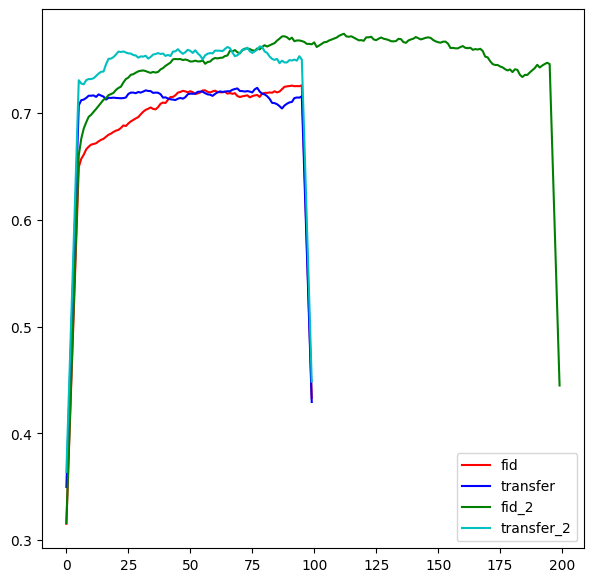

In [14]:
plt.figure(figsize=(7,7))
models =[fiducial_model, transfer_model, fiducial_model_2_channel, transfer_model_2_channel]#, transfer_model_fw, transfer_model_2_channel_fw]
names = ['fid','transfer','fid_2','transfer_2','transfer_fw','transfer_2_fw']
c = ['r','b','g','c','y','k']
for i, iModel in enumerate(models):
    
    plt.plot(iModel.history.epoch, np.convolve(iModel.history.history['val_accuracy'], np.ones(10)/10.,mode='same'), label=names[i], c=c[i])
    #plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])

plt.legend()

## Instead can transfer learning reduce the need for lots of simulations?

In [45]:
epochs=80
train_splits = [0.15, 0.25, 0.5, 0.75, 0.85]

In [ ]:
simulationNames = ['CDM','SIDM0.1','SIDM1']
nClasses = len(simulationNames)
all_histories = []
for train_split in train_splits:
    
    train, test  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                                      allDataFile='pickles/binned_data_20.pkl', train_split=train_split)

    fiducial_model = simpleCNN.getModel_ds(nClasses)

    history = fiducial_model.fit(
      x=train,
      validation_data=test,
      epochs=epochs
    )
    
    all_histories.append(history.history)


In [ ]:
#This data is CDM DMO matter + CDM stellar
#This data is SIDM1 DMO matter + CDM stellar
simulationNames = ['CDM','SIDM0.1','SIDM1']
nClasses = len(simulationNames)
all_transfer_histories = []

train_splits  = [0.15, 0.25, 0.5, 0.75, 0.85]

for train_split in train_splits:
    
    train_dmo, test_dmo  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True)

    transfer_model = simpleCNN.getModel_ds(nClasses)
    model = mertens.InceptionV4(input_shape=test_set[0][0].shape, bn_momentum=.0,classes=num_classes,
                                               feature_dropout=.33,num_layersA=1,num_layersB=1,num_layersC=1,leak=.03)
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = transfer_model.fit(
          x=train_dmo,
          validation_data=test_dmo,
          epochs=epochs, verbose=1
        )



 
    train, test  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                                      allDataFile='pickles/binned_data_20.pkl', train_split=train_split)
    
    history = transfer_model.fit(
      x=train,
      validation_data=test,
      epochs=epochs
    )
    
    all_transfer_histories.append(history.history)

In [69]:
pkl.dump([all_histories, all_transfer_histories], open("pickles/transfer_learn.pkl","wb"))

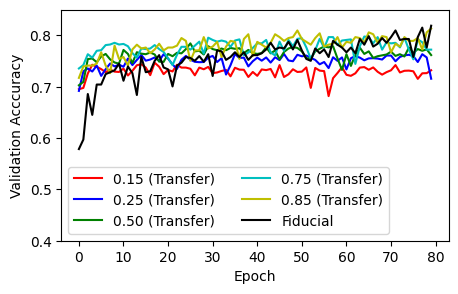

In [83]:
plt.figure(figsize=(5,3))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
transfer = pkl.load(open("pickles/transfer_learn.pkl","rb"))

c = ['r','b','g','c','y','k']
transfer_name = ['Transfer']
for j, models in enumerate(transfer[1:]):
    for i, iModel in enumerate(models):
        plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label="%0.2f (%s)" % (train_splits[i],transfer_name[j]), c=c[i])

plt.plot(np.arange(len(transfer[0][-1]['val_accuracy'])), transfer[0][-1]['val_accuracy'], label="Fiducial", c='k')
        
    #pltA.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))
plt.ylim(0.4,0.85)
plt.legend(ncols=2)
plt.savefig("../plots/transfer_learning.pdf")

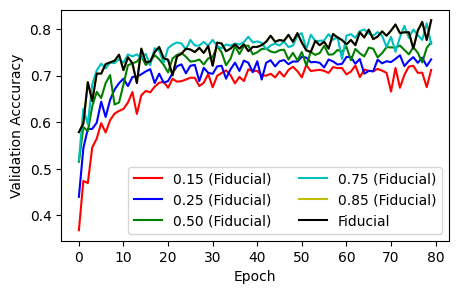

In [80]:
plt.figure(figsize=(5,3))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
transfer = pkl.load(open("pickles/transfer_learn.pkl","rb"))

c = ['r','b','g','c','y','k']
transfer_name = ['Fiducial','Transfer']
for j, models in enumerate(transfer[0:1]):
    for i, iModel in enumerate(models):
        plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label="%0.2f (%s)" % (train_splits[i],transfer_name[j]), c=c[i])

plt.plot(np.arange(len(transfer[0][-1]['val_accuracy'])), transfer[0][-1]['val_accuracy'], label="Fiducial", c='k')
        
    #pltA.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))

plt.legend(ncols=2)
plt.savefig("../plots/transfer_learning.pdf")

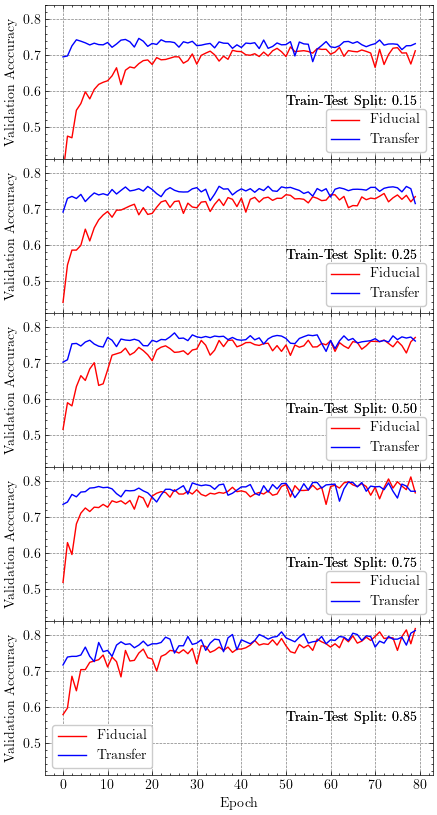

In [126]:
fig, ax = plt.subplots(len(train_splits), 1, figsize=(5,10))
fig.subplots_adjust(hspace=0)
plt.xlabel('Epoch')

transfer = pkl.load(open("pickles/transfer_learn.pkl","rb"))

c = ['r','b','g','c','y','k']
transfer_name = ['Fiducial','Transfer']
for j, models in enumerate(transfer):
    for i, iModel in enumerate(models):
        ax[i].plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], 
                   label="%s" % (transfer_name[j]), c=c[j])
        ax[i].annotate(  "Train-Test Split: %0.2f" % train_splits[i],(50,0.56))
        ax[i].set_ylim(0.41,0.84)
    #pltA.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))
        ax[i].set_ylabel('Validation Acccuracy')
        ax[i].legend(ncols=1)
plt.savefig("../plots/transfer_learning.pdf")

### Same but with the incpetion model

In [ ]:
simulationNames = ['CDM','SIDM0.1','SIDM1']
nClasses = len(simulationNames)
all_histories = []
for train_split in train_splits:
    
    train, test  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                                      allDataFile='pickles/binned_data_20.pkl', train_split=train_split)

    model = mertens.InceptionV4(input_shape=test[0][0].shape, bn_momentum=.0,classes=nClasses,
                                               feature_dropout=.33,num_layersA=1,num_layersB=1,num_layersC=1,leak=.03)
   
    optimizer = tf.keras.optimizers.Adam( learning_rate=1e-3 ) 

    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(
      x=train,
      validation_data=test,
      epochs=epochs
    )
    
    all_histories.append(history.history)


In [ ]:
#This data is CDM DMO matter + CDM stellar
#This data is SIDM1 DMO matter + CDM stellar
simulationNames = ['CDM','SIDM0.1','SIDM1']
nClasses = len(simulationNames)
all_transfer_histories = []

train_splits  = [0.15, 0.25, 0.5, 0.75, 0.85]

for train_split in train_splits:
    
    train_dmo, test_dmo  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                train_split=0.99,
                                allDataFile='pickles/binned_data_20_DMO.pkl', DMO=True)

    transfer_model = mertens.InceptionV4(input_shape=test_dmo[0][0].shape, bn_momentum=.0,classes=nClasses,
                                               feature_dropout=.33,num_layersA=1,num_layersB=1,num_layersC=1,leak=.03)
  
    optimizer = tf.keras.optimizers.Adam( learning_rate=1e-3 ) 

    transfer_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = transfer_model.fit(
          x=train_dmo,
          validation_data=test_dmo,
          epochs=epochs, verbose=1
        )



 
    train, test  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar'],
                                                      allDataFile='pickles/binned_data_20.pkl', train_split=train_split)
    
    history = transfer_model.fit(
      x=train,
      validation_data=test,
      epochs=epochs
    )
    
    all_transfer_histories.append(history.history)

In [118]:
pkl.dump([all_histories, all_transfer_histories[5:]], open("pickles/transfer_learn_inception.pkl","wb"))

In [117]:
train_splits

[0.15, 0.25, 0.5, 0.75, 0.85]

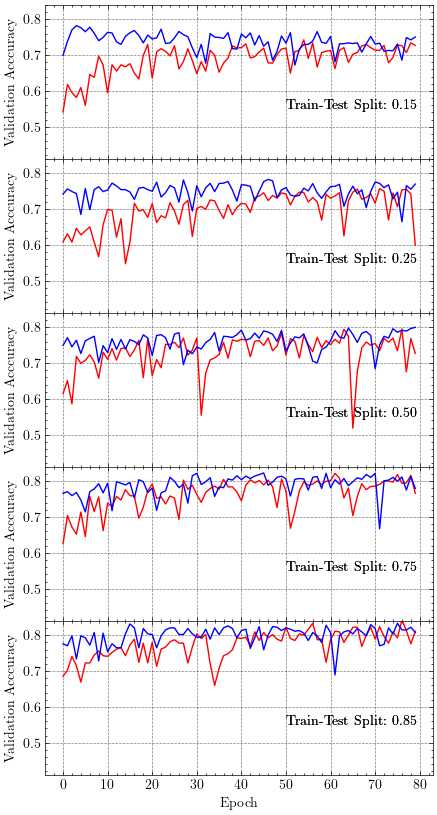

In [120]:
fig, ax = plt.subplots(len(train_splits), 1, figsize=(5,10))
fig.subplots_adjust(hspace=0)
plt.xlabel('Epoch')

transfer = pkl.load(open("pickles/transfer_learn_inception.pkl","rb"))

c = ['r','b','g','c','y','k']
transfer_name = ['Fiducial','Transfer']
for j, models in enumerate(transfer):
    for i, iModel in enumerate(models):
        ax[i].plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], 
                   label="%0.2f (%s)" % (train_splits[i],transfer_name[j]), c=c[j])
        ax[i].annotate(  "Train-Test Split: %0.2f" % train_splits[i],(50,0.55))
        ax[i].set_ylim(0.41,0.84)
    #pltA.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))
        ax[i].set_ylabel('Validation Acccuracy')
#plt.legend(ncols=2)
plt.savefig("../plots/transfer_learning.pdf")